# Proctor's algorithm for symplectic groups

First we load the file, that will compile c code and import definition. 
You need to have c compiler and toolchain installed. 
I use libgmp for random number generation in `proctor.c`, so you'll need 
to have libgmp-dev installed on Debian/Ubuntu.

In [15]:
%runfile proctor_sage.pyx

There are two functions, both accept numpy.ndarrays to pass values from 
them to c code without copying. First is 
`proctor_insertion_weights(xs:np.ndarray,ys:np.ndarray,seed:int=117)`
here xs and ys are weights, seed random seed for random number generation
in C code. It is useful when running in multiprocessing mode. 

Second function is
`proctor_insertion_weights(matrix:np.ndarray)`
which takes a zero-one matrix as an argument. Note that to produce diagrams 
inside of `n x k` rectangle matrix should be of `n x 2k` size. 

Both functions return pair of King tableaux filled in with numbers 
1,-1,2,-2,...n,-n and 1,-1,...,k,-k. 

Below we use first and second functions to produce random diagrams and to 
plot them. 

In [18]:
%%time
import numpy as np
rng=np.random.default_rng()

n=4
k=6
a=1
b=1
xs=a*np.ones(n)
ys=b*np.ones(k)

print(proctor_insertion_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32')))

([[1, 1, -1, -2], [3, 3, 4], [-3], [4]], [[1, 2, -3, 5], [3, -3, 4, -5], [-3, 4, -4], [4, 5], [6, -6], [], [], [], [], [], [], []])
CPU times: user 3.11 ms, sys: 0 ns, total: 3.11 ms
Wall time: 2.58 ms


In [19]:
%%time
import numpy as np
rng=np.random.default_rng()

n=200
k=300
a=1
b=1
xs=a*np.ones(n)
ys=b*np.ones(k)

diagram1=[len(x) for x in proctor_insertion_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[0] if len(x)>0]
print(diagram1)

[286, 284, 281, 279, 279, 275, 272, 269, 267, 264, 263, 260, 259, 257, 256, 255, 251, 250, 247, 246, 246, 245, 240, 239, 239, 235, 235, 232, 231, 230, 228, 228, 226, 224, 222, 220, 219, 217, 216, 215, 215, 213, 212, 211, 208, 206, 205, 204, 202, 201, 201, 198, 196, 196, 195, 193, 191, 189, 188, 187, 186, 186, 185, 183, 182, 181, 178, 177, 175, 173, 172, 170, 167, 167, 166, 162, 162, 161, 160, 159, 157, 156, 156, 153, 151, 150, 149, 149, 146, 143, 143, 143, 139, 139, 137, 135, 134, 133, 133, 131, 129, 129, 127, 127, 126, 122, 121, 119, 119, 118, 118, 113, 112, 111, 109, 109, 109, 107, 105, 105, 103, 103, 100, 100, 99, 96, 96, 94, 93, 92, 91, 90, 88, 86, 85, 85, 84, 82, 80, 79, 78, 78, 76, 73, 72, 71, 69, 69, 67, 64, 62, 60, 60, 59, 57, 56, 56, 54, 53, 52, 50, 49, 47, 47, 46, 43, 42, 41, 40, 39, 38, 37, 35, 34, 33, 31, 29, 27, 27, 25, 25, 24, 22, 21, 19, 19, 18, 17, 17, 14, 12, 11, 10, 8, 8, 5, 4, 4, 3, 1]
CPU times: user 1.59 s, sys: 4.59 ms, total: 1.6 s
Wall time: 1.6 s


For use of second function we need to produce 0-1 matrix. We do it by using 
`np.outer`. First we product products `xs[i]*ys[j]` and ratios `xs[i]/ys[j]`,
then we produce random zeros and ones for even and odd columns of zero-ones matrix
and combine them. 

In [20]:
ab=np.outer(xs,ys)
adivb=np.divide.outer(xs,ys)
even=np.array(rng.uniform(size=ab.shape)>ab/(1+ab),dtype='int8')
odd=np.array(rng.uniform(size=ab.shape)>adivb/(1+adivb),dtype='int8')
c = np.empty(shape=(n,2*k), dtype=even.dtype)
c[:,0::2] = even
c[:,1::2] = odd

diagram2=[len(x) for x in proctor_insertion(c)[0] if len(x)>0]
print(diagram2)

[285, 281, 279, 279, 276, 273, 270, 269, 266, 266, 264, 263, 261, 258, 257, 255, 254, 251, 246, 246, 244, 243, 243, 241, 238, 237, 236, 232, 232, 231, 228, 228, 223, 222, 220, 218, 215, 215, 215, 214, 210, 210, 210, 208, 205, 203, 203, 200, 199, 198, 196, 195, 192, 192, 189, 189, 188, 187, 187, 184, 184, 183, 181, 179, 178, 176, 176, 174, 171, 169, 169, 169, 168, 166, 163, 163, 163, 161, 161, 158, 157, 155, 155, 154, 152, 151, 149, 148, 148, 145, 142, 142, 140, 139, 138, 137, 134, 134, 134, 131, 129, 129, 127, 125, 125, 123, 123, 123, 121, 120, 119, 116, 115, 114, 111, 111, 109, 108, 107, 105, 102, 101, 100, 99, 98, 97, 96, 94, 92, 91, 91, 90, 88, 86, 86, 81, 80, 80, 78, 77, 75, 75, 73, 70, 70, 70, 69, 67, 67, 65, 64, 61, 60, 59, 59, 56, 55, 54, 53, 50, 50, 49, 48, 47, 46, 43, 43, 42, 41, 40, 39, 39, 36, 35, 34, 34, 30, 30, 29, 28, 26, 24, 23, 22, 20, 18, 17, 16, 15, 14, 13, 11, 11, 8, 7, 7, 7, 3, 2, 1]


We use the following function to draw both rotated diagrams inside of `n x k`
rectangle.

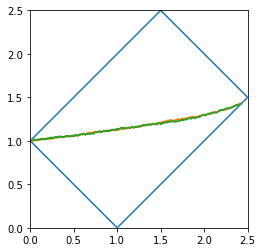

In [21]:
import matplotlib.pyplot as plt
def plot_multiple_diagrams(n,k,*diagrams):
    c=k/n
    plt.axes().set_aspect('equal','box')
    plt.ylim([0,c+1])
    plt.xlim([0,1+c])
    plt.plot([0,1,1+c,c,0],[1,0,c,1+c,1])
    for diagram in diagrams:
        plt.plot([(x+n-i-dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)],
                 [(x+i+dx)/n for (i,x) in enumerate(diagram) for dx in (0,1)])


plot_multiple_diagrams(n,k,diagram1,diagram2)

Let us compare to $GL(2n,\mathbb{C})$ diagrams

In [22]:
%runfile dual_rsk_sage.pyx

In [23]:
%%time
import numpy as np
rng=np.random.default_rng()

xs=np.ones(2*n)
ys=np.ones(2*k)

gldiagram=[len(x) for x in dual_rsk_with_weights(xs,ys,rng.integers(0,1<<32-1,dtype='int32'))[1] if len(x)>0]
print(diagram1)

[286, 284, 281, 279, 279, 275, 272, 269, 267, 264, 263, 260, 259, 257, 256, 255, 251, 250, 247, 246, 246, 245, 240, 239, 239, 235, 235, 232, 231, 230, 228, 228, 226, 224, 222, 220, 219, 217, 216, 215, 215, 213, 212, 211, 208, 206, 205, 204, 202, 201, 201, 198, 196, 196, 195, 193, 191, 189, 188, 187, 186, 186, 185, 183, 182, 181, 178, 177, 175, 173, 172, 170, 167, 167, 166, 162, 162, 161, 160, 159, 157, 156, 156, 153, 151, 150, 149, 149, 146, 143, 143, 143, 139, 139, 137, 135, 134, 133, 133, 131, 129, 129, 127, 127, 126, 122, 121, 119, 119, 118, 118, 113, 112, 111, 109, 109, 109, 107, 105, 105, 103, 103, 100, 100, 99, 96, 96, 94, 93, 92, 91, 90, 88, 86, 85, 85, 84, 82, 80, 79, 78, 78, 76, 73, 72, 71, 69, 69, 67, 64, 62, 60, 60, 59, 57, 56, 56, 54, 53, 52, 50, 49, 47, 47, 46, 43, 42, 41, 40, 39, 38, 37, 35, 34, 33, 31, 29, 27, 27, 25, 25, 24, 22, 21, 19, 19, 18, 17, 17, 14, 12, 11, 10, 8, 8, 5, 4, 4, 3, 1]
CPU times: user 3.34 s, sys: 15.9 ms, total: 3.35 s
Wall time: 3.32 s


We see that $Sp(2n,\mathbb{C})$-diagram is "half" of $GL(2n,\mathbb{C})$-diagram for the measure $\mu_{n,k}=2^{-2nk}\mathrm{dim}V_{Sp(2n)}(\lambda)\mathrm{dim}V_{Sp(2k)}(\overline{\lambda}')$. Similarly one can sample $\mu_{n,k}(\lambda|x,y)=\prod_{i,j}(x_i+x_i^{-1}+y_j+y_j^{-1})^{-1}sp_{\lambda}(x)sp_{\overline{\lambda}'}(y)$.

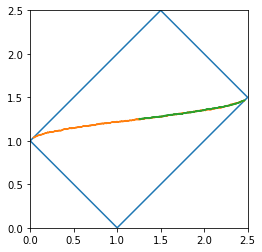

In [24]:
plot_multiple_diagrams(2*n,2*k,gldiagram,np.array(diagram1)+k)

To sample multiple times we can rely on `multiprocessing` module as
follows. Note the use of random seeds. We produce 10000 samples and plot 
the distribution of the first column length. I expect it to be described
by the corner distribution of Gravner, Tracy and Widom. 

As it takes about half a second to produce one diagram inside of `200x300`,
we use smaller box size below. It takes about 10 seconds to produce 
10000 samples of size `50x75` on my laptop.

CPU times: user 186 ms, sys: 125 ms, total: 311 ms
Wall time: 13.6 s


(array([  20.,  464., 4124., 5392.]),
 array([47, 48, 49, 50, 51]),
 <BarContainer object of 4 artists>)

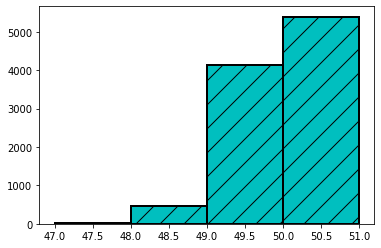

In [25]:
%%time
import subprocess

from multiprocessing import Pool
n=50
k=75
a=2
b=3
niter=10000
xs=a*np.ones(n)
ys=b*np.ones(k)

seeds = rng.integers(0,1<<32-1,dtype=int32,size=niter)

def f(i):
    return len([len(x) for x in proctor_insertion_weights(xs,ys,seeds[i])[0] if len(x)>0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)
    

Similarly, we can use the second function. We need to generate a random matrix 
for each sample independently with `numpy` random generator and we do it as 
explained in documentation here: https://numpy.org/doc/stable/reference/random/parallel.html


CPU times: user 631 ms, sys: 125 ms, total: 756 ms
Wall time: 12.8 s


(array([  13.,  432., 4009., 5546.]),
 array([47, 48, 49, 50, 51]),
 <BarContainer object of 4 artists>)

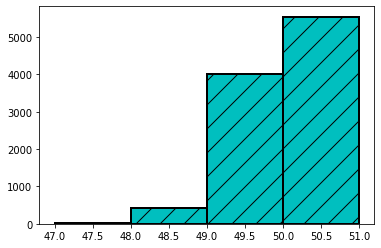

In [26]:
%%time
n=50
k=75
a=2
b=3

niter=10000
xs=a*np.ones(n)
ys=b*np.ones(k)

from numpy.random import SeedSequence, default_rng

ss = SeedSequence()
child_seeds = ss.spawn(niter)
streams = [default_rng(s) for s in child_seeds]

ab=np.outer(xs,ys)
adivb=np.divide.outer(xs,ys)
def f(i):
    even=np.array(streams[i].uniform(size=ab.shape)>ab/(1+ab),dtype='int8')
    odd=np.array(streams[i].uniform(size=ab.shape)>adivb/(1+adivb),dtype='int8')
    c = np.empty(shape=(n,2*k), dtype=even.dtype)
    c[:,0::2] = even
    c[:,1::2] = odd

    return len([len(x) for x in proctor_insertion(c)[0] if len(x)>0])

with Pool() as p:
    rawstat2g=p.map(f,range(niter))

binwidth=1
plt.hist(rawstat2g,bins=np.arange(min(rawstat2g), max(rawstat2g) + 2*binwidth, binwidth),hatch='/',edgecolor='k',linewidth=2, facecolor='c',fill=True)
